# Text message analysis

In [1]:
import pandas as pd
import conversation.message_analizer as ma

/tmp/ipykernel_9559/2497605655.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Setup

In [2]:

conversation_id = "replace me"


In [3]:
df = ma.get_signal_messages('path to csv', id=conversation_id, months=16)

## Day Frequency

In [4]:
df_you = df[df['type']=='incoming']
df_me  = df[df['type']=='outgoing']

<Axes: title={'center': 'Week-day text frequency'}, xlabel='Weekday', ylabel='Number of texts'>

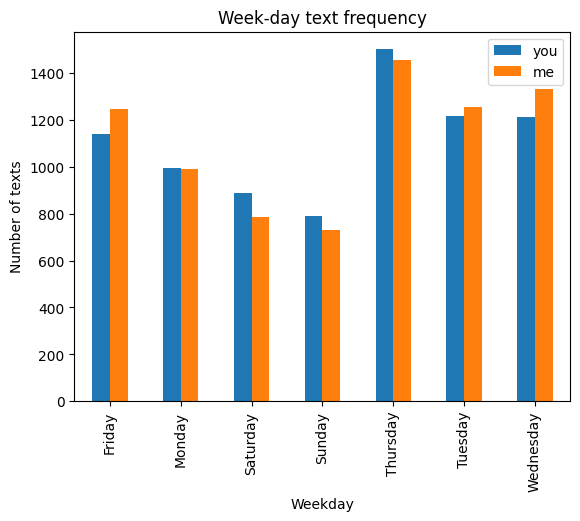

In [5]:
you_weekday = df_you.groupby('weekday').size()
me_weekday  = df_me.groupby('weekday').size()

new_df      = pd.DataFrame(index=you_weekday.index, data={'you': you_weekday.values, 'me': me_weekday.values})
new_df.plot.bar(title='Week-day text frequency', ylabel='Number of texts', xlabel='Weekday')

## Hour of the day

<Axes: title={'center': 'Hour in the day text frequency'}, xlabel='Hour in day', ylabel='Number of texts'>

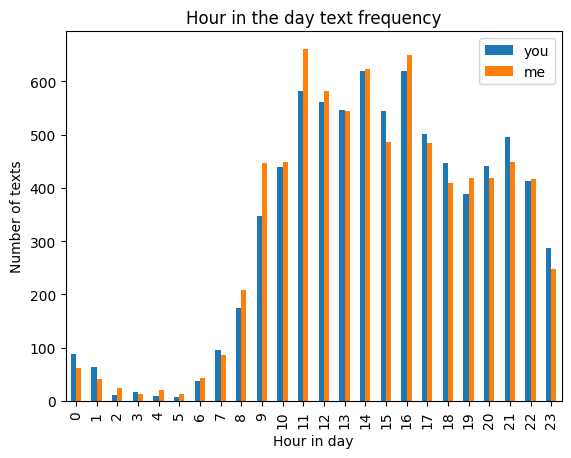

In [6]:
you_hour = df_you.groupby('hour').size()
me_hour  = df_me.groupby('hour').size()

new_df      = pd.DataFrame(index=you_hour.index, data={'you': you_hour.values, 'me': me_hour.values})
new_df.plot.bar(title='Hour in the day text frequency', ylabel='Number of texts', xlabel='Hour in day')

## First message of the day

<Axes: title={'center': 'Who texted first that day'}, xlabel='Date', ylabel='Monthly count'>

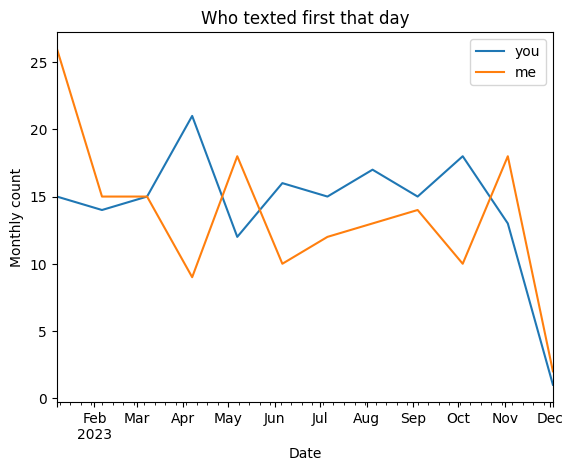

In [7]:

# df_first = df.groupby(pd.Grouper(key='time', freq='1D'))
first_df     = df.loc[df.groupby(pd.Grouper(key='time', freq='1D')).time.idxmin()]
first_df_you = first_df[first_df['type']=='incoming'].groupby(pd.Grouper(key='time', freq='30D')).size()
first_df_me  = first_df[first_df['type']=='outgoing'].groupby(pd.Grouper(key='time', freq='30D')).size()

new_df      = pd.DataFrame(index=first_df_you.index, data={'you': first_df_you.values, 'me': first_df_me.values})
new_df.plot(title='Who texted first that day', ylabel='Monthly count', xlabel='Date')

## Time between texts

Interesting, almost an exponential at the end.

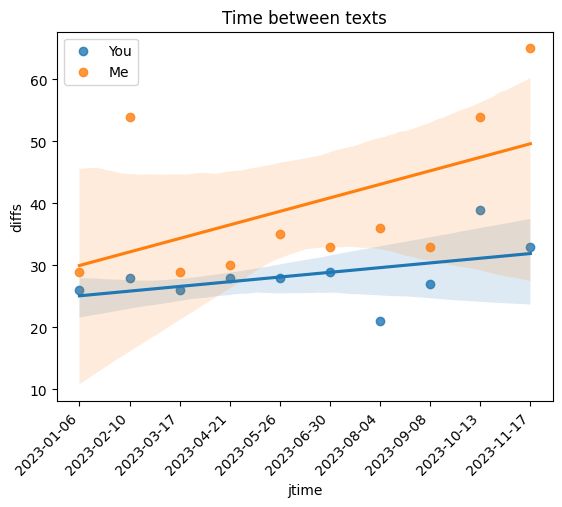

In [8]:
ma.plot_time_between_messages(df)

## Sentiment

### Sentiment averages. Sentiment taken for each message is averaged for each day.

It looks like the variance is increasing in this plot. Lets calculate the variance, but increase the bin size to capture the variance across days.

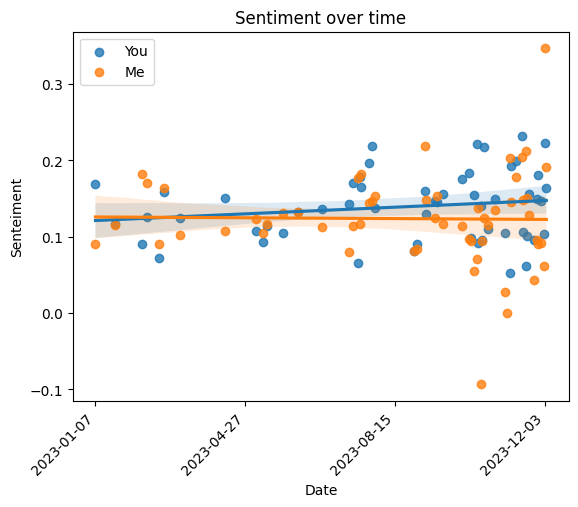

In [9]:
df = ma.get_signal_messages('~/Documents/signal/messages.csv', months=16, time_setting='received_at')
ma.plot_sentiment_aggregate(df, days='1D')

### Variance of binned averages of sentiment

Variance does increase!

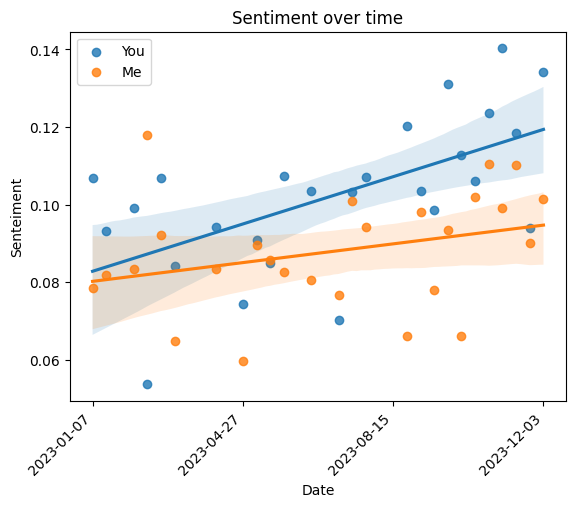

In [10]:
ma.plot_sentiment_aggregate(df, measure='var', days='10D')

## Sentiment by time of day

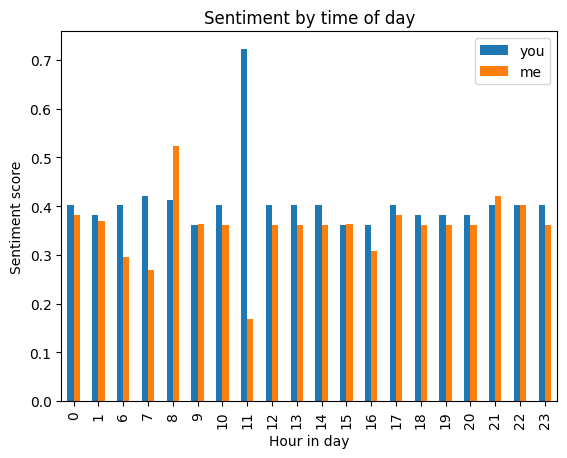

In [11]:
ma.plot_sentiment_time_of_day(df)

## Word clouds

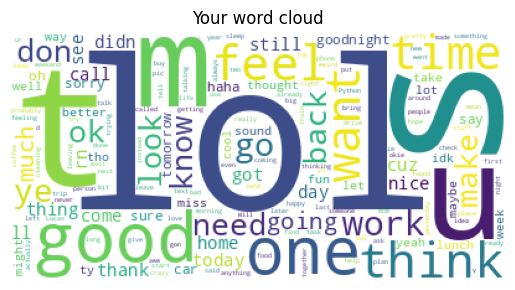

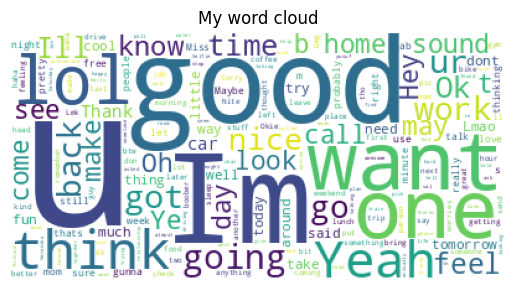

In [12]:
ma.wordclouds(df)